# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Assignment 3/interviewData.csv',header=None)
df.columns = ['Exam Mark','test score','Selection']
df.head()

,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Exploratory data analysis


**Answer the following:**
* What is your target variable?
> * Selection
* Do you need to encode the target variable (Yes/No)?
> * Yes
* If yes, briefly explain why you need to encode the target variable.
> * Machine learning algorithms typically require numerical inputs. Encoding categorical variables like "Selection" into numerical form allows algorithms to process them effectively.
* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?
> * Label Encoding
* Explain why you have selected the above encoding method.
> * Label Encoding is suitable when the target variable has only two categories (binary classification). Since "Selection" has only two values, "Yes" and "No", Label Encoding will convert them into 1 and 0 respectively, making it appropriate for binary classification tasks.

Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [ ]:
# Create a new dataset by apply the encoding  method selected above on the dataset

# Read this to implement this part
#  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

from sklearn.preprocessing import LabelEncoder

# Select the appropriate encode
label_encoder = LabelEncoder()

# Transform the target variable
df['Selection'] = label_encoder.fit_transform(df['Selection'])

display(df)

,Exam Mark,test score,Selection
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


<Axes: xlabel='Exam Mark', ylabel='test score'>

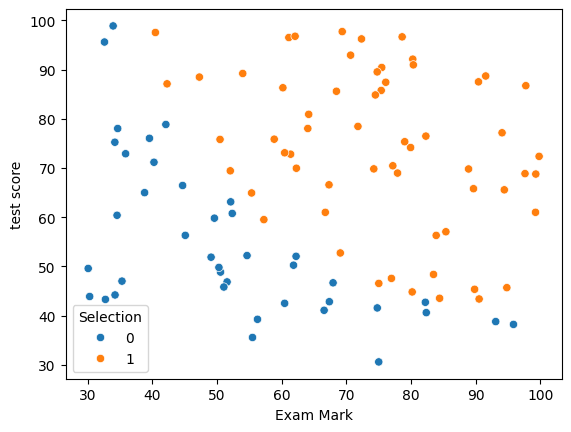

In [ ]:
# Wrie a code to visualize your data
# See https://seaborn.pydata.org/generated/seaborn.scatterplot.html

import seaborn as sns

# sns.________(____,x = ____,y=___,hue =____)
sns.scatterplot(data=df, x='Exam Mark', y='test score', hue='Selection')


## Logistic Regression Model

logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

That is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [ ]:
# Write a function 'predict' to compute the logistic Regression model

def Sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(w,b,x):
    z = np.dot(x, w) + b
    y_pred = Sigmoid(z)
    return y_pred


### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * Mean squared error (MSE) is not suitable for logistic regression, which is a classification problem. Logistic regression aims to predict the probability that an instance belongs to a particular class, and its output is a probability value between 0 and 1. MSE, on the other hand, is appropriate for regression problems where the output is continuous. For classification tasks like logistic regression, it's more common to use the cross-entropy loss (also known as log loss) as the cost function.

### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> * A loss function, also known as an error function or objective function, measures the discrepancy between the predicted values of a model and the actual target values. It quantifies how well the model is performing on individual data points.
* What is a cost function?
> * A cost function, also referred to as a objective function or optimization function, is a broader term that represents the average loss over the entire training dataset. It is typically defined as the sum or average of the loss function over all training examples.
* What is the distinction between them?
> * The loss function is calculated for each individual data point to measure the error between the predicted and actual values. It is used to assess the performance of the model on a single instance. On the other hand, the cost function aggregates the losses from all data points in the training set to provide a global measure of the model's performance. The cost function is optimized during the training process to minimize the overall error of the model.

### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b

$$ \frac{\partial J}{\partial w_1} = \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} $$

$$ \frac{\partial J}{\partial w_2} = \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} $$

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(x^{(i)}) - y^{(i)}) $$

In [ ]:
# write a function to estimate the derivatives of the cost function

def compute_gradient_wb(w,b,x,y):
    m = x.shape[0]  # Number of training examples
    z = np.dot(x, w) + b
    y_pred = Sigmoid(z)

    # Compute gradients
    dw = (1 / m) * np.dot(x.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)

    return dw, db

### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [ ]:
# Write a function to perform the gradient decent

def gradient_descent(w,b,X_train,X_test,y_train,y_test,alpha,num_iter):
    train_losses = []
    test_losses = []

    m_train = X_train.shape[0]
    m_test = X_test.shape[0]

    for i in range(num_iter):
        # Compute gradients
        dw, db = compute_gradient_wb(w, b, X_train, y_train)

        # Update parameters
        w -= alpha * dw
        b -= alpha * db

        # Compute train and test loss
        y_train_pred = predict(w, b, X_train)
        train_loss = -np.mean(y_train * np.log(y_train_pred) + (1 - y_train) * np.log(1 - y_train_pred))
        train_losses.append(train_loss)

        y_test_pred = predict(w, b, X_test)
        test_loss = -np.mean(y_test * np.log(y_test_pred) + (1 - y_test) * np.log(1 - y_test_pred))
        test_losses.append(test_loss)

    return w, b, train_losses, test_losses

## Model Training

In [ ]:
# Write the code to train the model

# Split the data into train and test datasets using
# see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# get the data from dataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# split the dataset such that 20% test and 80% train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# initilize the weights
np.random.seed(1)
w_ini = np.random.rand(2)
b_ini = -9

# Fix the learning rate
alpha = 0.001

# fix the number of iteration
num_iter = 1000


w,b,J_train,J_test = gradient_descent(w_ini,b_ini,X_train, X_test, y_train, y_test,alpha,num_iter)
print(f"Final parameters: w:{w}, b:{b}")

Final parameters: w:[0.08239114 0.06566054], b:-9.026491511598241


<ipython-input-8-db8c15d62748>:20: RuntimeWarning: divide by zero encountered in log
  train_loss = -np.mean(y_train * np.log(y_train_pred) + (1 - y_train) * np.log(1 - y_train_pred))
<ipython-input-8-db8c15d62748>:20: RuntimeWarning: invalid value encountered in multiply
  train_loss = -np.mean(y_train * np.log(y_train_pred) + (1 - y_train) * np.log(1 - y_train_pred))
<ipython-input-8-db8c15d62748>:24: RuntimeWarning: divide by zero encountered in log
  test_loss = -np.mean(y_test * np.log(y_test_pred) + (1 - y_test) * np.log(1 - y_test_pred))
<ipython-input-8-db8c15d62748>:24: RuntimeWarning: invalid value encountered in multiply
  test_loss = -np.mean(y_test * np.log(y_test_pred) + (1 - y_test) * np.log(1 - y_test_pred))


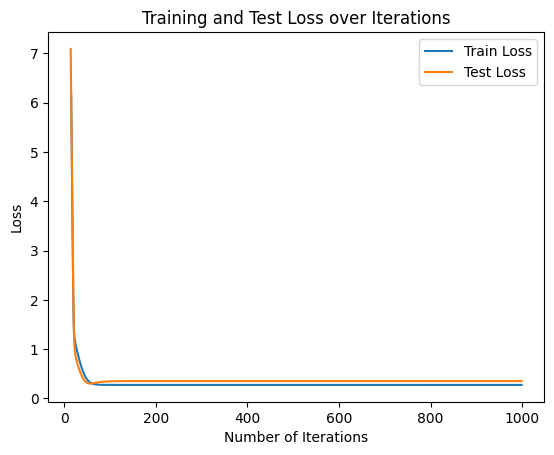

In [ ]:
# Plot the train and test loss in one plot
plt.plot(range(num_iter), J_train, label='Train Loss')
plt.plot(range(num_iter), J_test, label='Test Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Iterations')
plt.legend()
plt.show()


<Axes: xlabel='Exam Mark', ylabel='test score'>

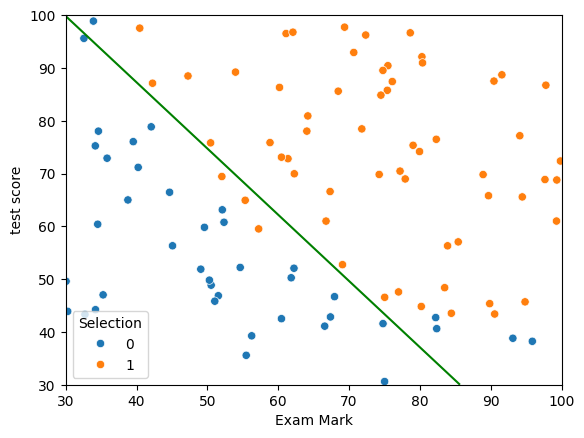

In [ ]:
#  plot the Logistic Regression Model for the estimated w and b values

P = 0.5 # the boundary seperation value (probability)

# Generate sample points in the domain 30 to 100
u = np.linspace(30, 100, 50)
v = np.linspace(30, 100, 50)

# making it into 2D mesh
X, Y = np.meshgrid(u, v)
logReg = np.zeros((len(u), len(v)))

# Predict the result of the (u,v) pair data with the estimated w and b values
for i in range(len(u)):
    for j in range(len(v)):
      zz = X[i,j]*w[0]+Y[i,j]*w[1]+b
      logReg[i,j] = 1/(1+np.exp(-zz))


plt.contour(u,v,logReg, levels = [P], colors="g" )

# to see the full function plot in the domain
# plt.contourf(u,v,logReg)

# Plot the real data
sns.scatterplot(df,x = 'Exam Mark',y='test score',hue ='Selection')


### Answer the following


* What does the P value signify in the provided code?
> * The P value signifies the boundary separation value (probability) in the logistic regression model. It represents the threshold probability above which data points are classified as belonging to one class and below which they are classified as belonging to the other class.
* How will altering the P value affect the outcome?
> * Altering the P value will change the decision boundary of the logistic regression model. A higher P value will result in a decision boundary that classifies more points as belonging to the positive class, while a lower P value will result in a decision boundary that classifies fewer points as belonging to the positive class.
* What range of values can P encompass?
> * The P value typically ranges between 0 and 1, representing probabilities. In the context of logistic regression, it is often set to a value close to 0.5, but it can be adjusted based on the specific requirements of the classification task.
* Describe the importance of the P value in a project aimed at classifying tumors as malignant or benign.
> * In a project aimed at classifying tumors as malignant or benign, the P value determines the threshold probability above which tumors are classified as malignant and below which they are classified as benign. Setting an appropriate P value is crucial as it directly affects the trade-off between false positives and false negatives. A higher P value may lead to more false negatives (benign tumors classified as malignant), while a lower P value may lead to more false positives (malignant tumors classified as benign). Finding the optimal P value requires balancing the sensitivity and specificity of the classification model to ensure accurate tumor diagnosis.

### Imagine a scenario where a student scores 65 marks in both the Exam and Test. Use your model to predict whether the student will pass the interview or not.

In [ ]:
# Student scores
exam_score = 65
test_score = 65

# Standardize the scores
exam_score_std = (exam_score - df['Exam Mark'].mean()) / df['Exam Mark'].std()
test_score_std = (test_score - df['test score'].mean()) / df['test score'].std()

# Predict using the model
prediction = predict(w, b, np.array([exam_score_std, test_score_std]).reshape(1, -1))

# Map prediction to pass/fail
if prediction >= 0.5:
    result = "Pass"
else:
    result = "Fail"

print(f"The student is predicted to {result} the interview.")


The student is predicted to Fail the interview.
